### Download the data
Let's download and uncompress our data and images here:

In [ ]:
import numpy as np
import seaborn
import sklearn.metrics

# We need to first download the data here:
# file_id = '1-mQuJbHvSq9nRugy96dr0aB7isfzaxMZ'
# file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
# !wget -O data.zip --no-check-certificate "$file_download_link"
# !unzip data.zip


Now lets start to implement our NN classes. First import numpy

## 1. Does it do what it is supposed to do?

Nothing is more ennoying than waiting for nothing. Therefore, it is important to first test the easy things instead of training for hours to see that you made a mistake in the loss function. Let us repeat the experiments from last time

### Linear regression: 25 all over again!

We created an array with a couple of input values $X$. Next we supplied $Y$ using the super duper complicated formula $y = 2x + 1$. In Numpy this looks like this:

In [ ]:
import numpy as np
X = np.arange(-2, 5, 1).reshape([1, 7]) # Columns as examples
Y = 2 * X + 1

Now we will build our model which will try to find our difficult formula and match the true value of 25. For this we will initiate our fresh class and set the loss to mean-square-error. Next we will add a single layer, with a single neuron and no activation function. Lets also try our pretty print :-)

In [ ]:
np.random.seed(1)

model = NeuralNetwork(loss='mean-square-error')
model.addLayer(inputDimension=1, units=1, activation='')

Now we will need our training loop again. It will look very familiar to our logistic regression model from last time:

In [ ]:
num_iterations = 1000
for ix in range(num_iterations):
    A = model.forward(X)
    model.backward(A, Y)
    model.update()
    if ix % 100 == 0:
        print('cost:', model.cost(Y, A))

The cost decreases as expected and due to the long training the value is close to machine precision. Would we again find 25 when we use the forward?

In [ ]:
model.forward(12)

Of course we do!

### A go at our Titanic dataset

In [184]:
import pandas as pd
df = pd.read_csv('./data/titanic/train_data.csv')
df = df.drop(['Unnamed: 0', 'PassengerId'], axis=1)
Y = df['Survived']
X = df.iloc[:,1:]
print(X.shape)
print(Y.shape)

(792, 14)
(792,)


We need to change the model to have 14 input features and of course the sigmoid activation function. The loss function will be cross-entropy, which is the default, so we do not need to specify it.

In [1]:
import keras
import sklearn, math
from keras import Sequential
from keras.layers import Dense, Conv2D
import numpy as np
np.random.seed(1)
model = Sequential()
model.add(Dense(input_dim=14, units=1, activation='sigmoid'))

Last time, we had an train accuracy of 80%. Can we match this as well?

In [7]:
def roundValue(A):
    return np.uint8( A > 0.5)

def accuracy(yhat, Y):
    return round(np.sum(yhat==Y) / len(yhat.flatten()) * 1000) / 10

In [194]:
import sklearn, math
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
model.fit(X,Y,epochs=100,verbose=0)
Yhat=model.predict(X)
print(sklearn.metrics.classification_report(Y,roundValue(Yhat)))

25/25 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       486
           1       0.81      0.74      0.77       306

    accuracy                           0.83       792
   macro avg       0.82      0.81      0.82       792
weighted avg       0.83      0.83      0.83       792



Of course we can!

### Q1: We will now implement customization via Keras as the examples above are specific to their respective datasets and are for example only to work through for learning purposes only. **They will not properly run if customized**

In [8]:
# Prerequisite library imports
import sklearn, math
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import minmax_scale

# Let's reimport our data
df = pd.read_csv('./data/titanic/train_data.csv')
X = df.drop(['Unnamed: 0', 'PassengerId','Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)
# Let's initialize our model
model = Sequential() # Initialising the ANN

(633, 14)

(633,)

### 1.1) Using the keras libraries and the model. Implement a form of scaling to your data either minmax normalization or standardization. Justify why you chose one over the other. (10 points)

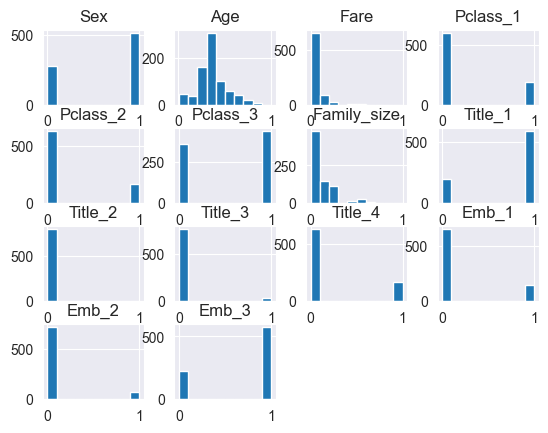

In [9]:
##GO LOOK ABOVE! I

from sklearn.preprocessing import minmax_scale
histogram = df.drop(['Unnamed: 0', 'PassengerId','Survived'], axis=1)
histogram.hist()
X_train=minmax_scale(X_train)
X_test=minmax_scale(X_test)
# Because by our data exploration, we know our data has no normal distribution in any of the columns. None of the columns as a standard deviation of 1, and by our histogram pairpolt we can see they don't centralize around the mean. Multiple attributes appear binary, but the main ones of concern are age, family size, and fare, which are not normal distributions, and have strong difference in variance.
#personal note: Y is a vector of 1s and 0s, indicating survival.

### 1.2) Using the example for traindata above create a model using different activation functions by setting MYACTIVATIONFXN: (10 points) 


# Hint! Start with model.add(Dense(units = 16, activation = 'relu', input_dim = ?))
# Make sure the input_dim parameter is set to the number of features in your X matrix.
MYACTIVATIONFXN = 'SOMEFXN'
model.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = ?))


In [10]:
# If you decide to initially use a signmoid, make sure the number of units matches the number of targets
# in this case we only have 1 target so for sigmoid you need to set units to 1
target_len=1
terms=X_train.shape[1]
model.add(Dense(units=target_len,activation="sigmoid",input_dim=terms))

#or the follwoing will work.
# for x in ["relu","softmax","sigmoid",ect]
#   model=Sequence()
#   model.add(Dense(units=target_len,activation="sigmoid",input_dim=terms))
# However, the best activation function for this

### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [11]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

### Here we will run our ANN using the fit function using a batch size of 1 and 10 epochs (In the examples above iterations is used instead of epochs)

In [13]:
model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 10,verbose=0)

### 1.3) How does the error (in terms of precission and recall) differ between your model and the example? Write in one paragraph or less how the error differs and why. (5 points)

In [14]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# Please see the BCC jupyter notebook to see how to do this
import sklearn, math
yhat_test=model.predict(x=X_test)
yhat_test=np.ndarray.round(yhat_test)
yyhat_test=[]
for i in yhat_test:
    yyhat_test.append(i[0])
print(sklearn.metrics.classification_report(y_true=y_test,y_pred=yyhat_test))
display("Example loss: 0.4515471545581365 and accuracy: 80.8%")
print(sum(yyhat_test==y_test),"correct predictions out of", y_test.size, "observations.\n My NN has an Accuracy of", round(sum(yyhat_test==y_test)*100/y_test.size,3)," and loss of 0.4782. Therefore, it is not as good as the example, as it has higher loss and lower accuracy. Our input dimensions, activation function, batch size, and epochs were the same. However, I rounded my values, so my threshold value was 0.5.")

5/5 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        92
           1       0.74      0.63      0.68        67

    accuracy                           0.75       159
   macro avg       0.75      0.73      0.74       159
weighted avg       0.75      0.75      0.74       159



'Example loss: 0.4515471545581365 and accuracy: 80.8%'

119 correct predictions out of 159 observations.
 My NN has an Accuracy of 74.843  and loss of 0.4782. Therefore, it is not as good as the example, as it has higher loss and lower accuracy. Our input dimensions, activation function, batch size, and epochs were the same. However, I rounded my values, so my threshold value was 0.5.


## 2) Complex fit of flowers

The cool stuf starts with more complex functions. The [Deep learning course from Andrew Ng](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning) show a way to predict [Rose-functions](https://en.wikipedia.org/wiki/Rose_(mathematics)) using a model with multiple nodes. Lets try that as well!

First we need to import the data:

In [3]:
import numpy as np
data = np.load('./data/rose/rose.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])
X, Y = data['X'], data['Y']

X
[[ 4.00000000e+00  3.99798021e+00  3.99192304e+00 ...  3.99192304e+00
   3.99798021e+00  4.00000000e+00]
 [ 0.00000000e+00  1.79686836e-02  3.58836449e-02 ... -3.58836449e-02
  -1.79686836e-02 -4.89858720e-16]]
Y
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

To give a feel how it looks, we will first plot the rose, which has 7 petals:

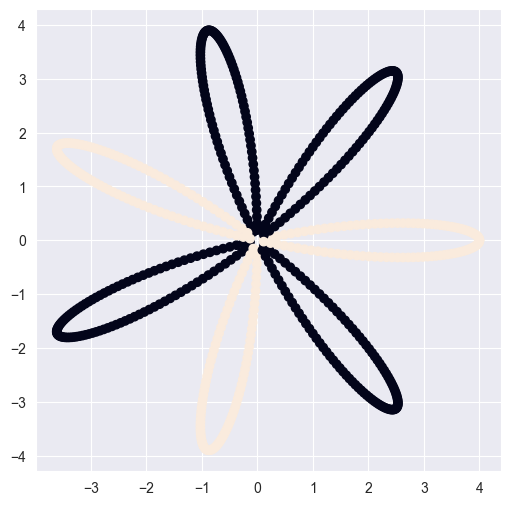

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X[0], X[1], c=Y.flatten())

We discussed before that a logistic regression model, like we have defined in our previous example, can only divide in a line. Lets try this out, as the data is clearly not defined in a line.

In [59]:
np.random.seed(1)
model = NeuralNetwork()
model.addLayer(inputDimension=2, units=1, activation='sigmoid')
model

[
  1 -> Dense layer (nx=2, nh=1, activation=sigmoid)
]

In [60]:
num_iterations = 1000
for ix in range(num_iterations):
    A = model.forward(X)
    model.backward(A, Y)
    model.update(learning_rate=1.2)
    if ix % 1000 == 0:
        print('cost:', model.cost(Y, A)) 

cost: 0.6927732264810165


A short piece of code to generate a contour plot and our Rose

Definitely not a great fit and clearly a line. Now lets add another layer with four units to the model, with the last layer being the same sigmoid layer. The activation function for this model we keep similar to the one from Andrew, which was a tanh.

In [61]:
np.random.seed(1)

model = NeuralNetwork()
model.addLayer(inputDimension=2, units=4, activation='tanh')
model.addLayer(units=1, activation='sigmoid')
model

[
  1 -> Dense layer (nx=2, nh=4, activation=tanh)
  2 -> Dense layer (nx=4, nh=1, activation=sigmoid)
]

In [62]:
num_iterations = 4000
for ix in range(num_iterations):
    A = model.forward(X)
    model.backward(A, Y)
    model.update(learning_rate=1.2)
    if ix % 1000 == 0:
        print('cost:', model.cost(Y, A))

cost: 0.6931058695708833
cost: 0.01872511046013702
cost: 0.01096037547619664
cost: 0.0077232644078200465


This is something that really amazes me. Just a tiny layer more and we have the power to learn this much more complex function. Really great stuff!

#### Q2: We will now implement customization via Keras as the examples above are specific to their respective datasets and are for example only to work through for learning purposes only. They will not properly run if customized

In [63]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, y = data['X'].transpose(), data['Y'].transpose()
display([X.shape,"X"])
display([y.shape,"Y"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)
# Let's initialize our model
# Initialising the ANN

[(688, 2), 'X']

[(688, 1), 'Y']

(550, 2)

(550, 1)

### 2.1) Using the example above, try different number of nodes(units) and different activation functions. How does your loss change? (10 points)

In [64]:

permutations=dict()
for i in ["relu","tanh","sigmoid","softmax"]:
    for ii in range(1,5):
            permut_id="{} with {} nodes".format(i,ii)
            model=Sequential()
            terms=X_train.shape[1]
            model.add(Dense(units=ii,activation=i,input_dim=2))
            model.add(Dense(units=1,activation="sigmoid"))
            model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
            model_history=model.fit(X_train,y_train,batch_size = 1, epochs = 10, verbose=0)
            permutations.update({permut_id:min(model_history.history["loss"])})
            del model
for i in permutations.keys():
    print(i,"loss", permutations[i])

## Across all my activation functions, loss decreases over epochs, and there was little change over the addition of nodes. However, the best activation funciton was tanh with 4 nodes.

relu with 1 nodes loss 0.7183276414871216
relu with 2 nodes loss 0.5434565544128418
relu with 3 nodes loss 0.6418653726577759
relu with 4 nodes loss 0.6377295851707458
tanh with 1 nodes loss 0.6297563314437866
tanh with 2 nodes loss 0.5165278315544128
tanh with 3 nodes loss 0.324264794588089
tanh with 4 nodes loss 0.23875543475151062
sigmoid with 1 nodes loss 0.6419781446456909
sigmoid with 2 nodes loss 0.6682504415512085
sigmoid with 3 nodes loss 0.6429927945137024
sigmoid with 4 nodes loss 0.5854223966598511
softmax with 1 nodes loss 0.6874459981918335
softmax with 2 nodes loss 0.6292181015014648
softmax with 3 nodes loss 0.6128010749816895
softmax with 4 nodes loss 0.5459587574005127


### 2.2) Calculate your new error for 2 different models using classification report. Also, using the metrics, explain why you see the same or why you see a different error. (10 points) 

In [65]:
import numpy as np
for i in ["tanh","sigmoid"]:
    for ii in range(1,6):
        model=Sequential()
        terms=X_train.shape[1]
        model.add(Dense(units=ii,activation=i,input_dim=2))
        model.add(Dense(units=1,activation="sigmoid"))
        model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
        model.fit(X_train,y_train,batch_size = 1, epochs = 10, verbose=0)
        yhat_test=model.predict(X_test)
        yhat_test=np.round(yhat_test)
        # yyhat_test=[]
        # for iii in yhat_test:
        #     yyhat_test.append(i[0])
        print(sklearn.metrics.classification_report(y_true=y_test.astype(int),y_pred=yhat_test.astype(int)))
        print(i, "is activation function of hidden layer, with", ii, "nodes.")
        print("Accuracy of", np.round(sum(yhat_test==y_test)*100/y_test.size,3))
        del model

#Softmax 4 nodes acc= 74.638
#Relu 5 nodes acc= 76.812
#tanh 4 nodes acc= 96.377
# I see difference because softmax is all about probability that adds up to 1 across all events, while Relu is about prediciting the next number. In this case, Relu worked better for some reason, perhaps because its better for predicting how much each coordinate factors into adding up to something rather than softmax which just tells you how probable the coordinates relate to the point being 1. Therefore, the sigmoidal second layer would take those Relu predicitions, and predict how probable a point was to be based on the weighted value. Softmax didnt do so well, because it was just probability. It just passed on a probabillity value to a probability calculator. It still did well, but there wasn't as much gain in information.

5/5 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        86
           1       0.58      0.56      0.57        52

    accuracy                           0.68       138
   macro avg       0.66      0.66      0.66       138
weighted avg       0.68      0.68      0.68       138

tanh is activation function of hidden layer, with 1 nodes.
Accuracy of [68.116]
5/5 [==============================] - 0s 499us/step
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        86
           1       0.62      0.67      0.65        52

    accuracy                           0.72       138
   macro avg       0.71      0.71      0.71       138
weighted avg       0.73      0.72      0.73       138

tanh is activation function of hidden layer, with 2 nodes.
Accuracy of [72.464]
5/5 [==============================] - 0s 602us/step
              precision    rec

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

5/5 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        86
           1       0.76      0.37      0.49        52

    accuracy                           0.72       138
   macro avg       0.73      0.65      0.65       138
weighted avg       0.73      0.72      0.69       138

sigmoid is activation function of hidden layer, with 2 nodes.
Accuracy of [71.739]
5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        86
           1       0.49      0.33      0.39        52

    accuracy                           0.62       138
   macro avg       0.57      0.56      0.56       138
weighted avg       0.59      0.62      0.60       138

sigmoid is activation function of hidden layer, with 3 nodes.
Accuracy of [61.594]
5/5 [==============================] - 0s 0s/step
              precision    re

### 2.3) Choose your best model! Now plot the new results using the plotting example shown above but using our newly trained best/coolest model. (10 points) 

226/226 [==============================] - 0s 989us/step


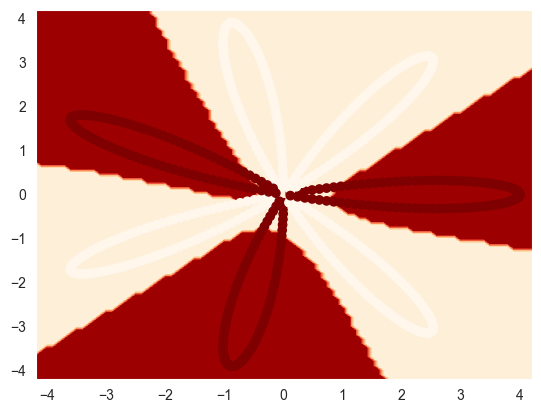

In [150]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, Y = data['X'].transpose(), data['Y'].transpose()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

model=Sequential()
terms=X_train.shape[1]
model.add(Dense(units=4,activation="tanh",input_dim=2))
model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
model.fit(X_train,y_train,batch_size = 1, epochs = 10, verbose=0)
yhat_test=model.predict(X)
yhat_test=np.round(yhat_test)

def testModelKeras(X, y, model, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model.predict(((np.c_[xmesh.ravel(), ymesh.ravel()])))
    Z = (Z > 0.5) * 1
    Z = Z.T.reshape(xmesh.shape)
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.OrRd)
    plt.scatter(X[:,0], X[:,1], c=y.flatten().T, cmap=plt.cm.OrRd)

testModelKeras(X,Y,model)

## 3) Cats vs not cats

In the same course from Andrew, they pointed out that there is a terrible shortage of cat-detectors on the internet. Therefore, our class should detect cats in style! Lets download the same dataset. For details, please check out Andrew's Course, which is big fun!

In [15]:
import numpy as np
data = np.load('./data/cats/cats.npz')
X_train, y_train = data['Xtrain'], data['Ytrain']
X_test, y_test = data['Xtest'], data['Ytest']
display(X_train.shape)
display(y_train.shape)

(12288, 209)

(1, 209)

Same functions as before.

In [7]:
def roundValue(A):
    return np.uint8( A > 0.5)

def accuracy(yhat, Y):
    return round(np.sum(yhat==Y) / len(yhat.flatten()) * 1000) / 10

The model will be the same as the two layer model from the course. first layer has 7 units and a Relu activation function. Second layer is the sigmoid cat/no-cat layer.

In [197]:
nx = X_train.shape[0]

np.random.seed(1)

model = NeuralNetwork()
model.addLayer(inputDimension=nx, units=7, activation='relu')
model.addLayer(units=1, activation='sigmoid')
model

NameError: name 'NeuralNetwork' is not defined

In [85]:
num_iterations = 1000
for ix in range(1, num_iterations+1):
    A = model.forward(X_train)
    model.backward(A, y_train)
    model.update(learning_rate=0.03)
    if ix % 100 == 0:
        yhat_test = roundValue(A)
        print('cost:', model.cost(y_train, A), f'\taccuracy: {accuracy(yhat_test, y_train)}%')

cost: 0.5638451365986756 	accuracy: 65.6%
cost: 0.5020981427480249 	accuracy: 66.5%
cost: 0.4529594637416237 	accuracy: 81.3%
cost: 0.39260693267512314 	accuracy: 77.5%
cost: 0.4667194566908311 	accuracy: 75.6%
cost: 0.42690871480681475 	accuracy: 75.6%
cost: 0.1932177323059878 	accuracy: 93.3%
cost: 0.15682913115625954 	accuracy: 96.2%
cost: 0.07479941195788926 	accuracy: 98.6%
cost: 0.047901119076435704 	accuracy: 98.6%


Amazing accuracy. But we of course all know we should check this with a proper test set:

In [87]:
A = model.forward(X_test)
yhat_test = roundValue(A)
acc = accuracy(yhat_test, y_test)
acc

76.0

An accuracy of 74% is definitely not bad for such a simple model which only works on pixel values. For the fun of it, lets look at some samples:

#### Q3: Your turn! Let's do this!!!

In [34]:
import numpy as np
data = np.load('./data/cats/cats.npz')
X_train, y_train = data['Xtrain'].transpose(), data['Ytrain'].transpose()
X_test, y_test = data['Xtest'].transpose(), data['Ytest'].transpose()
display(X_train.shape)
display(y_train.shape)
X_train = X_train.reshape([X_train.shape[0], 64, 64, 3])
X_test = X_test.reshape([X_test.shape[0], 64, 64, 3])
# display(X_train.shape)
# display(y_train.shape)

# Let's initialize our model
#model = Sequential() # Initialising the ANN

(209, 12288)

(209, 1)

### 3.1) Same as before, build a new model with different number of hidden layers, nodes and activation functions. Describe reason for any similarity or difference (30 points)

In [156]:
# Try using different layers and activation functions.
np.random.seed(1)
input_len=X_train.shape[0]
permutations=dict()
for i in ["relu","softplus","tanh","softsign","softmax","sigmoid"]:
    for ii in range(4,9):
            permut_id="{} with {} nodes".format(i,ii)
            model=Sequential()
            model.add(Dense(units=ii,activation=i,input_dim=X_train.shape[1]))
            model.add(Dense(units=1,activation="sigmoid"))
            model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
            model_history=model.fit(X_train,y_train,batch_size = 1, epochs = 10, verbose=0)
            permutations.update({permut_id:min(model_history.history["loss"])})
            del model
for i in permutations.keys():
    print(i,"loss", permutations[i])
#Best was softsign with 8 nodes, loss 0.55382

relu with 4 nodes loss 0.6501952409744263
relu with 5 nodes loss 0.650793731212616
relu with 6 nodes loss 0.6503146886825562
relu with 7 nodes loss 0.6503342390060425
relu with 8 nodes loss 0.6503793597221375
softplus with 4 nodes loss 0.7094765305519104
softplus with 5 nodes loss 0.6497145891189575
softplus with 6 nodes loss 0.6501066088676453
softplus with 7 nodes loss 0.7257552146911621
softplus with 8 nodes loss 0.7145529389381409
tanh with 4 nodes loss 0.654321014881134
tanh with 5 nodes loss 0.6592758297920227
tanh with 6 nodes loss 0.6459874510765076
tanh with 7 nodes loss 0.6478002667427063
tanh with 8 nodes loss 0.6420013308525085
softsign with 4 nodes loss 0.531661331653595
softsign with 5 nodes loss 0.5725018978118896
softsign with 6 nodes loss 0.5723817944526672
softsign with 7 nodes loss 0.5596989989280701
softsign with 8 nodes loss 0.5476290583610535
softmax with 4 nodes loss 0.6497352719306946
softmax with 5 nodes loss 0.6436960101127625
softmax with 6 nodes loss 0.63772

In [157]:
# Try using different iterations using a simple layout like above. 10, 100, 1000 epochs.
# What happens with your loss?
np.random.seed(1)
permutationsd={}
for i in [10,20,30]:
    permut_idd="Training model with {} epochs".format(i)
    model=Sequential()
    model.add(Dense(units=8,activation="softsign",input_dim=X_train.shape[1]))
    model.add(Dense(units=1,activation="sigmoid"))
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
    model_history=model.fit(X_train,y_train,batch_size = 1, epochs = i, verbose=0)
    permutationsd.update({permut_idd:min(model_history.history["loss"])})
    del model
for i in permutationsd.keys():
    print(i,"loss", permutationsd[i])
#As my number of epochs increases, my loss decreases, logmarithically.

Training model with 10 epochs loss 0.5554710030555725
Training model with 20 epochs loss 0.4660756289958954
Training model with 30 epochs loss 0.3415444493293762


In [158]:
# Try using different layers and activation functions.
np.random.seed(1)
for i in ["relu","softplus","tanh","softsign","softmax"]:
    for ii in range(5,10):
            permut_id="{} with {} nodes".format(i,ii)
            model=Sequential()
            model.add(Dense(units=5,activation="relu",input_dim=X_train.shape[1]))
            model.add(Dense(units=ii,activation=i))
            model.add(Dense(units=1,activation="sigmoid"))
            model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
            model_history=model.fit(X_train,y_train,batch_size = 1, epochs = 10, verbose=0)
            permutations.update({permut_id:min(model_history.history["loss"])})
            del model
for i in permutations.keys():
    print(i,"loss", permutations[i])
    #tanh with 6 nodes 0.13126

relu with 4 nodes loss 0.6501952409744263
relu with 5 nodes loss 0.6501760482788086
relu with 6 nodes loss 0.645300030708313
relu with 7 nodes loss 0.6445528864860535
relu with 8 nodes loss 0.6502681970596313
softplus with 4 nodes loss 0.7094765305519104
softplus with 5 nodes loss 0.6091588139533997
softplus with 6 nodes loss 0.6506390571594238
softplus with 7 nodes loss 0.5192340612411499
softplus with 8 nodes loss 0.6450085639953613
tanh with 4 nodes loss 0.654321014881134
tanh with 5 nodes loss 0.6451611518859863
tanh with 6 nodes loss 0.6438359022140503
tanh with 7 nodes loss 0.6442897915840149
tanh with 8 nodes loss 0.6334151029586792
softsign with 4 nodes loss 0.531661331653595
softsign with 5 nodes loss 0.6447386741638184
softsign with 6 nodes loss 0.5943335294723511
softsign with 7 nodes loss 0.634235143661499
softsign with 8 nodes loss 0.6444883346557617
softmax with 4 nodes loss 0.6497352719306946
softmax with 5 nodes loss 0.6347717642784119
softmax with 6 nodes loss 0.644235

In [19]:
###################### this is just a test to make sure it works
np.random.seed(1)
X_train = X_train.reshape([X_train.shape[0], 64, 64, 3])
X_test = X_test.reshape([X_test.shape[0], 64, 64, 3])
from keras.layers import Conv2D, Flatten
from keras import Sequential
permutation={}
permut_id=0
model=Sequential()
model.add(Conv2D(input_shape=(64,64,3), filters=8 , padding="same",activation="relu",kernel_size=3))
model.add(Flatten())
model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
model_history=model.fit(X_train,y_train,batch_size = 1, epochs = 30, verbose=0)
yhat_test=np.round(model.predict(X_test))
Acc=sum(yhat_test==y_test)/y_test.size
permutation.update({permut_id:"Convolution filters with {} activation, kernel size{} and acc {}".format("relu",3,Acc)})
for i in permutation.keys():
    print(permutation[i])

2/2 [==============================] - 0s 16ms/step
Convolution filters with relu activation, kernel size3 and acc [0.72]


In [2]:
del model

In [28]:
# What happens when you add convolutional layers? What happens to our training loss?
np.random.seed(1)
X_train = X_train.reshape([X_train.shape[0], 64, 64, 3])
X_test = X_test.reshape([X_test.shape[0], 64, 64, 3])
from keras.layers import Conv2D, Flatten, Dense
from keras import Sequential
import numpy as np
permutation={}
permut_id=0
for ii in ["relu","softplus","tanh","softsign","softmax"]:
    for iii in [3,5]:
        for i in [1,3,6,8]:
            permut_id+=1
            model=Sequential()
            model.add(Conv2D(input_shape=(64,64,3), filters=i,padding="same",activation=ii,kernel_size=iii))
            model.add(Flatten())
            model.add(Dense(units=5,activation="relu",input_dim=X_train.shape[1]))
            model.add(Dense(units=6,activation="tanh"))
            model.add(Dense(units=1,activation="sigmoid"))
            model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
            model_history=model.fit(X_train,y_train,batch_size = 1, epochs = 30, verbose=0)
            yhat_test=np.round(model.predict(X_test))
            report=(yhat_test==y_test)
            reporter=0
            for ix in report:
                if ix==True:
                    reporter+=1
            Acc=reporter/y_test.size
            permutation.update({permut_id:(ii,iii,i,Acc,min(model_history.history["loss"]))})
            del model,Acc,yhat_test

    #####In general, when adding convolution levels, the loss decreases, with reductiong magnitude depending on the number of filters and kernel size.

2/2 [==============================] - 0s 18ms/step


In [29]:
#incase you want to access evaluation without rerunning model iteration.
print("activation function, kernel, filters, accuracy, loss")
for i in permutation.keys():
    print(i,permutation[i])
    # 5 ('relu', 5, 1, 0.54, 0.0031939081382006407)
    # 4 ('relu', 3, 8, 0.82, 0.23703831434249878)
    # 10 ('softplus', 3, 3, 0.34, 0.6448517441749573)
    # 21 ('tanh', 5, 1, 0.56, 0.001955116633325815)
    # 19 ('tanh', 3, 6, 0.76, 0.04950324073433876)
    # 28 ('softsign', 3, 8, 0.64, 0.005160648841410875)
    # 37 ('softmax', 5, 1, 0.34, 0.6445574164390564)

activation function, kernel, filters, accuracy, loss
1 ('relu', 3, 1, 0.34, 0.6447906494140625)
2 ('relu', 3, 3, 0.34, 0.6449474692344666)
3 ('relu', 3, 6, 0.72, 0.302361398935318)
4 ('relu', 3, 8, 0.82, 0.23703831434249878)
5 ('relu', 5, 1, 0.54, 0.0031939081382006407)
6 ('relu', 5, 3, 0.74, 0.17077185213565826)
7 ('relu', 5, 6, 0.76, 0.19742940366268158)
8 ('relu', 5, 8, 0.74, 0.31613340973854065)
9 ('softplus', 3, 1, 0.34, 0.5894545316696167)
10 ('softplus', 3, 3, 0.34, 0.6448517441749573)
11 ('softplus', 3, 6, 0.34, 0.6449942588806152)
12 ('softplus', 3, 8, 0.34, 0.6456044912338257)
13 ('softplus', 5, 1, 0.34, 0.6373232007026672)
14 ('softplus', 5, 3, 0.34, 0.644900918006897)
15 ('softplus', 5, 6, 0.34, 0.6445134282112122)
16 ('softplus', 5, 8, 0.34, 0.6451860666275024)
17 ('tanh', 3, 1, 0.58, 0.03050895221531391)
18 ('tanh', 3, 3, 0.64, 1.6350585383406724e-06)
19 ('tanh', 3, 6, 0.76, 0.04950324073433876)
20 ('tanh', 3, 8, 0.34, 0.605290949344635)
21 ('tanh', 5, 1, 0.56, 0.00195511

### 3.2) Calculate your accuracy (10 points) 

In [35]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
import numpy as np
from keras.layers import Conv2D, Flatten, Dense
from keras import Sequential
np.random.seed(1)

X_train = X_train.reshape([X_train.shape[0], 64, 64, 3])
X_test = X_test.reshape([X_test.shape[0], 64, 64, 3])

# 4 ('relu', 3, 8, 0.82, 0.23703831434249878)
np.random.seed(1)
model=Sequential()
model.add(Conv2D(input_shape=(64,64,3), filters=8,padding="same",activation="softsign",kernel_size=3))
model.add(Flatten())
model.add(Dense(units=5,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(units=6,activation="tanh"))
model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
model_history=model.fit(X_train,y_train,batch_size = 1, epochs = 3, verbose=1)
yhat_test=model.predict(X_test)
del model
# In your report since we are only predicting cats you will need to set the parameter labels

Epoch 1/3
209/209 [==============================] - 1s 2ms/step - loss: 0.8054
Epoch 2/3
209/209 [==============================] - 0s 2ms/step - loss: 0.9064
Epoch 3/3
2/2 [==============================] - 0s 6ms/step


In [35]:
labels=(np.round(yhat_test))

[[0.957389771938324], [0.957389771938324], [0.957389771938324], [0.7375614047050476], [0.957389771938324], [0.004836999345570803], [0.004859542939811945], [0.957389771938324], [0.957389771938324], [0.957389771938324], [0.006605278700590134], [0.027661651372909546], [0.9527215361595154], [0.957389771938324], [0.0048326170071959496], [0.957389771938324], [0.004832266364246607], [0.957389771938324], [0.06455782055854797], [0.005937029607594013], [0.05364840105175972], [0.2624439597129822], [0.00483235577121377], [0.13658149540424347], [0.957389771938324], [0.957389771938324], [0.957389771938324], [0.0048745921812951565], [0.957389771938324], [0.03860750421881676], [0.00811793003231287], [0.957389771938324], [0.5340532660484314], [0.5871354341506958], [0.957389771938324], [0.0048354314640164375], [0.004898404702544212], [0.957389771938324], [0.3556099832057953], [0.004919813945889473], [0.957389771938324], [0.005366310942918062], [0.3375856876373291], [0.004832266364246607], [0.95738977193

In [24]:
roundValue(yhat_test)
report=(np.round(yhat_test)==y_test)
reporter=0
for ix in report:
    if ix==True:
        reporter+=1
print("accuracy",accuracy(np.round(yhat_test),y_test))
classification_arrays=zip(yhat_test,y_test)

accuracy 70.0


### 3.3) Calculate your precision and recall manually (10 points)

In [11]:
# Recall calculation
true_pos=0
for i in classification_arrays:
    if bool(i[0]) and bool(i[1]):
        true_pos+=1
recall=true_pos/sum(y_test)
print(recall)

[1.]


In [12]:
# Precision calculationthing=yhat_test[yhat_test==y_test]
precision=true_pos/y_test.size
print(precision)

0.66


### Let's plot!!!

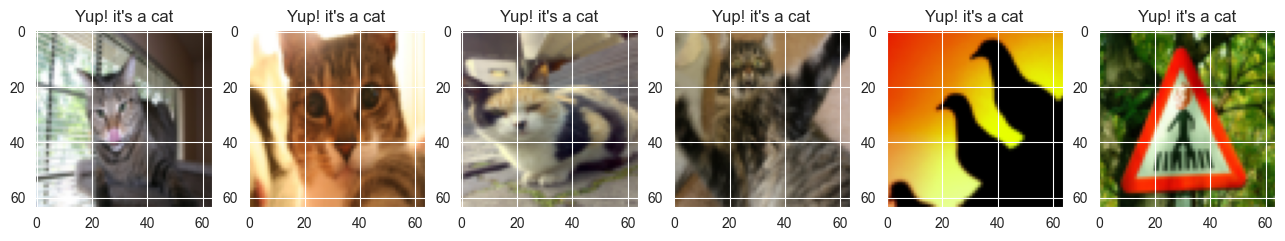

In [18]:
import matplotlib.pyplot as plt
n = 6
imgs = X_test.reshape([50, 64, 64, 3])
fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0])
    ax[ix].imshow(imgs[num])
    if yhat_test[num] == 0:
        ax[ix].set_title('This is clearly not a cat')
    else:
        ax[ix].set_title('Yup! it\'s a cat')

## Round up!

I hope you all had fun, writing your own ANN. In my opinon, writing these things from the ground up is the best way to learn how it actually works. I hope that you see that these systems are not magical, but simple matrix multiplications, unfortunately just a very lot of them. The most difficult part is of course the back propagation, where we need to calculate the gradients. Our simple ANNs are quite doable, but adding more different layers to them, can make it a bit more cumbersome. Still the essence is very similar to what we have done today.

My suggestion is to play around with these structures, rewrite parts of them, or even better, write your own from scratch!


Please let me know if you have any comments!

In [ ]:
#Would have liked more handholding, or explaination of how images are processed, or prepared for neuralnets.

## Apendix

### Generating Rose Data

In [ ]:
def generateRoseData():
    k=7
    pointPerPetal = 100
    cutOff = 0.1
    r = 4

    theta = np.linspace(0,np.pi, pointPerPetal * k)
    xx = r * np.cos(k * theta) * np.cos(theta)
    yy = r * np.cos(k * theta) * np.sin(theta)
    cc = [np.ones(pointPerPetal) if ix % 3 == 0 else np.zeros(pointPerPetal) for ix in np.arange(k)]
    cc = np.roll(np.hstack(cc).astype(np.uint8), -pointPerPetal//2)
    x = xx[(xx**2 + yy**2)**0.5 > cutOff]
    y = yy[(xx**2 + yy**2)**0.5 > cutOff]
    col = cc[(xx**2 + yy**2)**0.5 > cutOff]
    X = np.vstack([x,y])
    Y = np.copy(col).reshape([1, -1])
    return X, Y
X, Y = generateRoseData()
np.savez_compressed('./data/rose/rose.npz', X=X, Y=Y)

### Processing Andrews CatvNotCat data

In [ ]:
# If you get an error here, install h5py via pip3 install h5py
import h5py

In [ ]:
# Data downloaded from:
# https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation
def processCatData():
    train_dataset = h5py.File("./data/cats/train_catvnoncat.h5", mode='r')
    Xtrain = np.array(train_dataset["train_set_x"])
    Y_train = np.array(train_dataset["train_set_y"])
    test_dataset = h5py.File("./data/cats/test_catvnoncat.h5", mode='r')
    Xtest = np.array(test_dataset["test_set_x"])
    Y_test = np.array(test_dataset["test_set_y"])
    X_train = Xtrain / 255
    X_test = Xtest / 255
    X_train = X_train.reshape(209, -1).T
    Y_train = Y_train.reshape(-1, 209)
    X_test = X_test.reshape(50, -1).T
    Y_test = Y_test.reshape(-1, 50)
    return X_train, X_test, Y_train, Y_test
Xtrain, Xtest, Ytrain, Ytest = processCatData()
np.savez_compressed('./data/cats/cats.npz', Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain, Ytest=Ytest)

# Credits
#### Edwin Solares - Conversion to google colab, conversion to Keras and preprocessing data to work with Kears
#### Dennis Bakhuis - May the Fourth (be with you) 2020
https://linkedin.com/in/dennisbakhuis/ \
https://github.com/dennisbakhuis


### Exercise 4 - Collaborative Statement (5 points) 
#### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

In [ ]:
#Usha worked beside me 11/13/2022 to interpret the questions. I reviewed the introduction with Caroline, but the actual problems I solved with help from Piazza forumns and googling. Worked with Solares on monday to solve many... many issues with preprocessing images.

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Follow the requirements in the question

# Use the following libraries only:
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()


In [82]:
type(np.array(ytest_median))

numpy.ndarray

In [90]:
#Using the following code, create a neural network with 3 hidden layers in the housing data.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# The data in the variables X & y are valid and contain only valid data

# In the box below:
# 1. Create a linear model
# 2. Train the linear model using X_train & y_train
# 3. Predict values using X_test called yhat_test
# 4. Calculate your mean squared error (MSE) manually
# Do not use the any library imports for calculating your MSE
import numpy
Lin=LinearRegression()
Lin.fit(X_train,y_train)
yhat=Lin.predict(X_test)
MSE=math.sqrt(sum((y_test-yhat)**2))

NameError: name 'math' is not defined

In [84]:
yhat

array([[0.45743442, 0.47696537],
       [0.45741132, 0.47693458],
       [0.4574343 , 0.47696516],
       ...,
       [0.45720252, 0.47665665],
       [0.45213115, 0.4699844 ],
       [0.45693558, 0.47630152]], dtype=float32)